In [1]:
%matplotlib inline # 省略掉plt.show()这一步
import time
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torchvision
from PIL import Image
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE' # plt绘图报错（不显示图的问题）
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

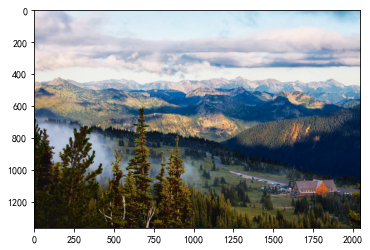

In [2]:

img = Image.open('../Dive-into-DL-PyTorch/data/rainier.jpg')
plt.imshow(img)

In [3]:
def show_images(imgs, num_rows, num_cols, scale=2):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j])
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    return axes

def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale)

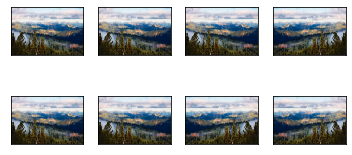

In [4]:
# 实现一半概率的图像水平（左右）翻转。
apply(img, torchvision.transforms.RandomHorizontalFlip())


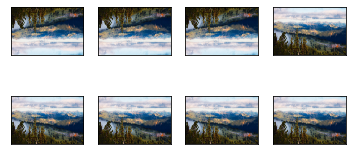

In [5]:
# 实现一半概率的图像垂直（上下）翻转。
apply(img, torchvision.transforms.RandomVerticalFlip())

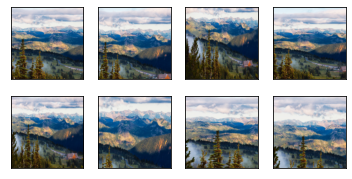

In [6]:
# 随机裁剪出一块面积为原面积10%∼100%的区域，且该区域的宽和高之比随机取自0.5∼2，然后再将该区域的宽和高分别缩放到200像素
shape_aug = torchvision.transforms.RandomResizedCrop(200, scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

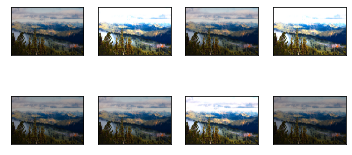

In [7]:
"""
亮度（brightness）、对比度（contrast）、饱和度（saturation）和色调（hue）
"""

# 我们将图像的亮度随机变化为原图亮度的50%（1−0.5）∼150%（1+0.5）。
apply(img, torchvision.transforms.ColorJitter(brightness=0.5))

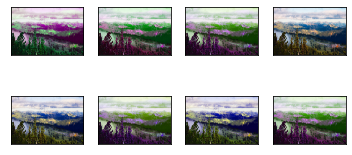

In [8]:
# 随机变化图像的色调
apply(img, torchvision.transforms.ColorJitter(hue=0.5))

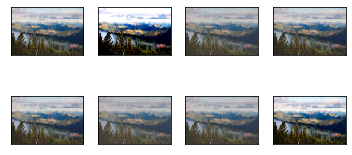

In [9]:
# 随机变化图像的对比度
apply(img, torchvision.transforms.ColorJitter(contrast=0.5))

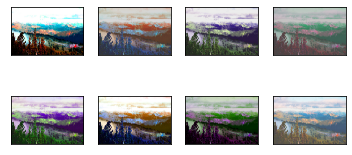

In [10]:
# 我们也可以同时设置如何随机变化图像的亮度（brightness）、对比度（contrast）、饱和度（saturation）和色调（hue）
color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)

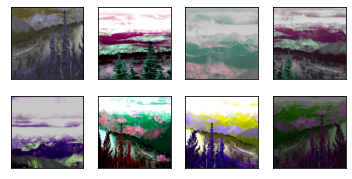

In [11]:
# 将上面定义的多个图像增广方法叠加起来，再应用到每张图像之上。
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(), color_aug, shape_aug])
apply(img, augs)